## Capstone EDA - Exploratory Data Analysis

#### Author   : Mehrnoosh Behzadi
#### Contact : mehrnoosh.behzadi@gmail.com
#### Date       : June 18th, 2023

### Intruduction

The field of artificial intelligence (AI) research in the context of brain gliomas has witnessed a significant surge in popularity, largely attributable to the increasing accessibility of MRI datasets. Notably, one prominent dataset that has garnered attention is the UCSF-PDGM dataset, curated by the University of California San Francisco. This dataset comprises a remarkable collection of 501 subjects with histopathologically-proven diffuse gliomas, and it boasts a standardized 3 Tesla preoperative brain tumor MRI protocol.

The creators of the UCSF-PDGM dataset have generously made it publicly accessible, with the intention of fostering collaborative research and facilitating advancements in AI applications for diffuse gliomas. Consequently, this dataset serves as a valuable resource for training and testing AI models, thereby propelling the development of innovative approaches for brain glioma diagnosis and treatment. 

In this capstone project, we leverage the UCSF-PDGM dataset to explore and develop a state-of-the-art model for the detection and characterization of diffuse gliomas, with the aim of enhancing clinical decision-making and patient outcomes. The project aims to improve the current diagnostic process and provide healthcare professionals with a reliable tool for more effective brain tumor diagnosis.

### Data Dictionary
First, we take some time to study the data dictionary below. This will be a useful reference about what a particular column of data means.

In [78]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [79]:
# Read in the dictionary
pd.read_csv('UCSF-PDGM-metadata_glossary.csv', encoding='latin1')

Term  \
0                                      ID   
1                                     Sex   
2                              Age at MRI   
3                           WHO CNS Grade   
4   Final pathologic diagnosis (WHO 2021)   
5                             MGMT status   
6                              MGMT index   
7                                  1p/19q   
8                                     IDH   
9                          1-dead 0-alive   
10                                     OS   
11                                    EOR   
12                                    NaN   
13                                    NaN   
14                Biopsy prior to imaging   

                                           Represents  \
0                         DICOM (0010,0020) PatientID   
1                       DICOM (0010,0040) Patient Sex   
2                  Age in years at time of MR imaging   
3   Grade per the 2021 World Health Organization C...   
4   Final (integrated) pathologic diagnosis per th...   
5   O6-methylguanine-DNA methyltransferase status ...   
6   O6-methylguanine-DNA methyltransferase methyla...   
7   presence of codeletion of 1p and 19q genes, as...   
8   isocitrate dehydrogenase mutation subtype char...   
9   Survival status of the patient at last clinica...   
10  Overall survival in days from initial diagnosi...   
11  Extent of resection determined by review of op...   
12                                                NaN   
13                                                NaN   
14  Was a burr-hole biopsy performed prior to MRI ...   

                                               Values  
0                                                 NaN  
1                                                 M,F  
2                                                 NaN  
3                                               2,3,4  
4   Glioblastoma, Isocitrate dehydrogenase (IDH) -...  
5                   negative, positive, indeterminate  
6                                         0-17, blank  
7   intact, co-deletion, relative co-deletion, unk...  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11               biopsy (only a biopsy was performed)  
12                          STR  (subtotal resection)  
13                       GTR  (gross total resection)  
14                                   yes , no,  blank

**Description of the Clinical Data:**

The clinical data, stored in a DataFrame called df_clinical, contains information about various attributes related to patients. The dataset is part of the UCSF-PDGM (University of California San Francisco - Precision Diagnosis and Genomic Medicine) project.

In [80]:
# Read in and store the clinical data 
df_clinical = pd.read_csv('UCSF-PDGM-metadata_v2.csv')

In [81]:
# Display the first few rows of the DataFrame
df_clinical.head()

ID Sex  Age at MRI  WHO CNS Grade  \
0  UCSF-PDGM-004   M          66              4   
1  UCSF-PDGM-005   F          80              4   
2  UCSF-PDGM-007   M          70              4   
3  UCSF-PDGM-008   M          70              4   
4  UCSF-PDGM-009   F          68              4   

  Final pathologic diagnosis (WHO 2021)    MGMT status  MGMT index 1p/19q  \
0            Glioblastoma, IDH-wildtype       negative         0.0    NaN   
1            Glioblastoma, IDH-wildtype  indeterminate         NaN    NaN   
2            Glioblastoma, IDH-wildtype  indeterminate         NaN    NaN   
3            Glioblastoma, IDH-wildtype       negative         0.0    NaN   
4            Glioblastoma, IDH-wildtype       negative         0.0    NaN   

        IDH  1-dead 0-alive      OS     EOR Biopsy prior to imaging  \
0  wildtype               1  1303.0     STR                      No   
1  wildtype               1   274.0  biopsy                      No   
2  wildtype               1   417.0     STR                      No   
3  wildtype               1   185.0     STR                      No   
4  wildtype               1   389.0     STR                      No   

        BraTS21 ID BraTS21 Segmentation Cohort BraTS21 MGMT Cohort  
0  BraTS2021_00097                    Training            Training  
1              NaN                         NaN                 NaN  
2  BraTS2021_00103                    Training                 NaN  
3              NaN                         NaN                 NaN  
4  BraTS2021_00049                    Training            Training

In [82]:
df_clinical.shape

(501, 16)

In [83]:
# Display the summary information about the DataFrame
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     501 non-null    object 
 1   Sex                                    501 non-null    object 
 2   Age at MRI                             501 non-null    int64  
 3   WHO CNS Grade                          501 non-null    int64  
 4   Final pathologic diagnosis (WHO 2021)  501 non-null    object 
 5   MGMT status                            421 non-null    object 
 6   MGMT index                             413 non-null    float64
 7   1p/19q                                 410 non-null    object 
 8   IDH                                    501 non-null    object 
 9   1-dead 0-alive                         501 non-null    int64  
 10  OS                                     500 non-null    float64
 11  EOR   

The clinical data is crucial for understanding the characteristics and demographics of the brain tumor patients in the study.
It provides valuable information about various clinical features, including tumor grade, genetic markers, patient outcomes, and other relevant factors.
The data will be used for exploratory data analysis, and training predictive models in the capstone project.

In [84]:
# The sum of the boolean array gives the number Trues, whether a row appears more than once
df_clinical.duplicated().sum()

0

In [85]:
# Identify the number of missing values in each column
df_clinical.isna().sum(axis=0)

ID                                         0
Sex                                        0
Age at MRI                                 0
WHO CNS Grade                              0
Final pathologic diagnosis (WHO 2021)      0
MGMT status                               80
MGMT index                                88
1p/19q                                    91
IDH                                        0
1-dead 0-alive                             0
OS                                         1
EOR                                        1
Biopsy prior to imaging                    0
BraTS21 ID                               203
BraTS21 Segmentation Cohort              203
BraTS21 MGMT Cohort                      218
dtype: int64

In [86]:
# Count the number of patients based on gender
gender_counts = df_clinical['Sex'].value_counts()

# Display the counts
print(gender_counts)

Sex
M    299
F    202
Name: count, dtype: int64


This information indicates that there are more male patients (299) than female patients (202) in the dataset.

In [87]:
# Count the number of patients based on age
age_counts = df_clinical['Age at MRI'].value_counts()

# Display the counts
print(age_counts)

Age at MRI
60    19
65    18
57    18
61    17
71    16
      ..
89     1
86     1
27     1
17     1
85     1
Name: count, Length: 70, dtype: int64


In [88]:
# Create a histogram plot using Plotly
fig = px.histogram(df_clinical, x='Age at MRI', nbins=25)

# Display the plot
fig.show()

In [89]:
# Count the number of patients based on final pathologic diagnosis
diagnosis_counts = df_clinical['Final pathologic diagnosis (WHO 2021)'].value_counts()

# Display the counts
print(diagnosis_counts)

Final pathologic diagnosis (WHO 2021)
Glioblastoma, IDH-wildtype                         374
Astrocytoma, IDH-mutant                             90
Astrocytoma, IDH-wildtype                           24
Oligodendroglioma, IDH-mutant, 1p/19q-codeleted     13
Name: count, dtype: int64


The most common final pathologic diagnosis, based on the WHO 2021 classification, in the dataset is Glioblastoma with IDH-wildtype. Other diagnoses such as Astrocytoma with IDH-mutant, Astrocytoma with IDH-wildtype, and Oligodendroglioma with IDH-mutant and 1p/19q-codeleted are less frequent in comparison.

In [90]:
# Create a bar plot using Plotly
fig = px.bar(x=diagnosis_counts.index, y=diagnosis_counts.values)

# Display the plot
fig.show()


In [91]:
# Create a scatter plot using Plotly
fig = px.scatter(df_clinical, x='Age at MRI', y='Final pathologic diagnosis (WHO 2021)', 
                 color='Final pathologic diagnosis (WHO 2021)')

# Display the plot
fig.show()

In [92]:
# Create a scatter plot using Plotly
fig = px.scatter(df_clinical, x='Age at MRI', y='Final pathologic diagnosis (WHO 2021)', 
                 color='Sex', symbol='Sex')

# Display the plot
fig.show()

In [93]:
# Count the number of patients based on cancer grade
grade_counts = df_clinical['WHO CNS Grade'].value_counts()

# Display the counts
print(grade_counts)

WHO CNS Grade
4    402
2     56
3     43
Name: count, dtype: int64


In [94]:
# Count the number of patients based on survival status 
status_counts = df_clinical['1-dead 0-alive'].value_counts()

# Display the counts
print(status_counts)

1-dead 0-alive
1    251
0    250
Name: count, dtype: int64


In [103]:
# Plotting the bar chart for survival status
fig = px.bar(status_counts, x=status_counts.index, y=status_counts.values,
             labels={'x': 'Survival Status', 'y': 'Count'},
             color=status_counts.index, title='Distribution of Patients by Survival Status')

# Add labels to the bars
fig.update_layout(annotations=[dict(x=xi, y=yi, text=str(yi), showarrow=False)
                              for xi, yi in zip(status_counts.index, status_counts.values)])

# Plotting the scatter plot for gender and disease
scatter_fig = px.scatter(df_clinical, x='Age at MRI', y='Final pathologic diagnosis (WHO 2021)',
                         color='1-dead 0-alive', symbol='Sex', 
                         title='Patient Status based on Gender and Disease')

# Update the legend position to avoid overlap
scatter_fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

# Display the plots
fig.show()
scatter_fig.show()


It is important to note that this dataset lacks information on healthy brain tissue for training and testing the model.

To address this limitation and ensure a comprehensive analysis, an additional dataset containing information on healthy brain tissue needs to be obtained. This dataset will be used to augment the existing data and facilitate a more robust training and testing process for the model.

The inclusion of healthy brain tissue data is essential for developing a well-rounded model that can accurately differentiate between cancerous and non-cancerous brain tissue. By incorporating a diverse range of brain tissue samples, the model's performance can be enhanced, leading to more reliable and accurate predictions.

In [95]:
# Install and read necessary library to read nifti files
#!pip install nibabel
import nibabel as nib

In [96]:
# Get the pixle resolution of image
data.shape

(240, 240, 155)

### Copying Selected MRI images to a Destination Folder

In [97]:
#Copying Selected Files to a Destination Folder

#Import necessary libraries
import os
import shutil
from Copying_Selected_Files_2Destination_Folder import copy_files

# Define the root directory where the files are located
root_dir = r'D:\Data Science\MRI\The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'
# Define the destination folder where the files will be copied
destination_folder = r'D:\Data Science\ML-Capstone\The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
# Copy the image files with "FLAIR.nii.gz" extension to the destination folder
copy_files(root_dir, "FLAIR.nii.gz", destination_folder)

# Print a success message
print("Image files copied successfully.")

Image files copied successfully.


This code recursively searches for image files with a specific extension in a given root directory and copies them to a destination folder. Specifically, it looks for files ending with "FLAIR.nii.gz" in the provided root directory and its subfolders, and copies them to the specified destination folder.

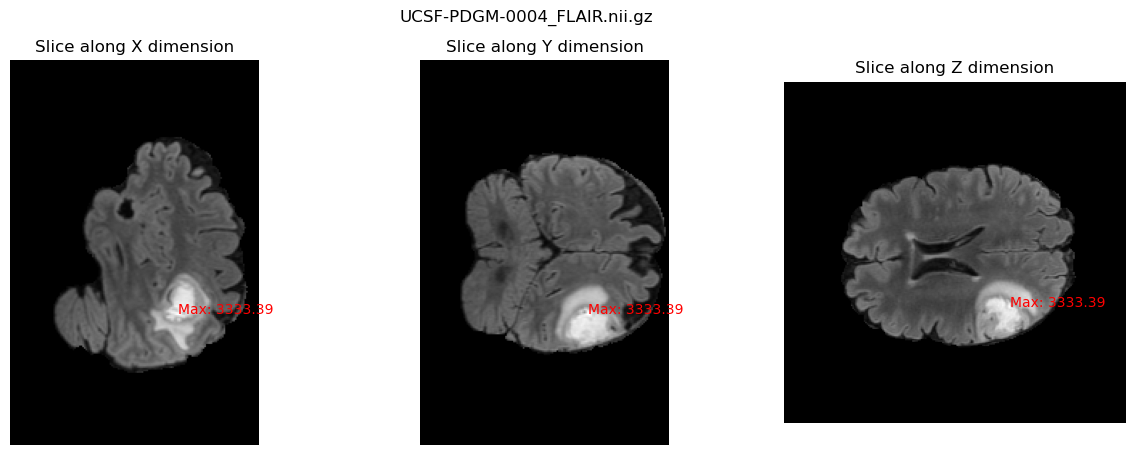

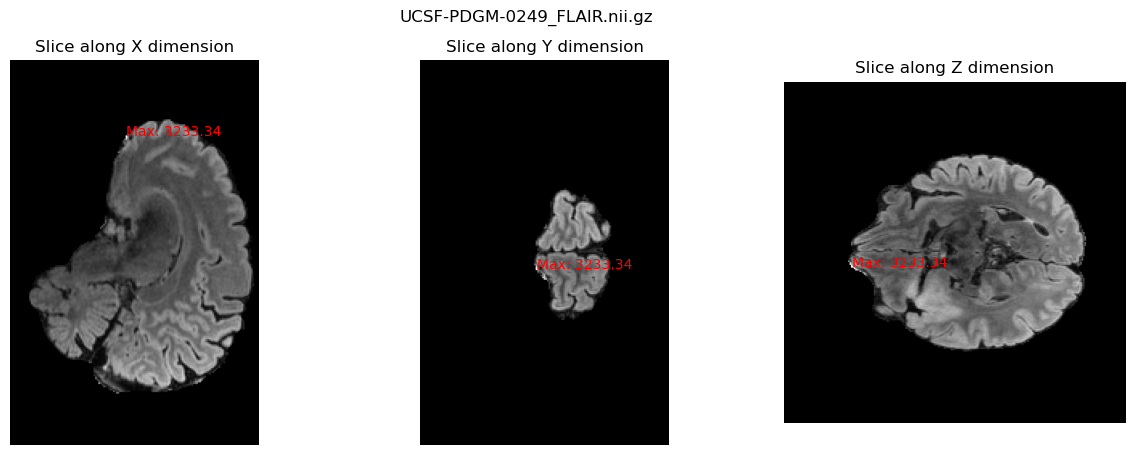

In [98]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Specify the folder path where the images are located
folder_path = 'The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Load and extract the 2D slices along X, Y, and Z dimensions
for file_name in os.listdir(folder_path):
    if file_name.endswith('FLAIR.nii.gz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the image using nibabel
        image = nib.load(file_path)
        data = image.get_fdata()
        
        # Find the maximum value in the image - we're assuming that maximum value belongs to tumor 
        max_value = np.max(data)
        
        # Find the indices where the maximum value occurs
        max_indices = np.where(data == max_value)
        
        # Extract the sections containing the maximum value
        slice_x = data[max_indices[0][0], :, :]
        slice_y = data[:, max_indices[1][0], :]
        slice_z = data[:, :, max_indices[2][0]]
        
        # Plot the tumor slices with the maximum value highlighted in red
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        axes[0].imshow(slice_x, cmap='gray')
        axes[0].set_title('Slice along X dimension')
        axes[0].axis('off')
        axes[0].text(max_indices[2][0], max_indices[1][0], f"Max: {max_value:.2f}", color='red')
        
        axes[1].imshow(slice_y, cmap='gray')
        axes[1].set_title('Slice along Y dimension')
        axes[1].axis('off')
        axes[1].text(max_indices[2][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
        
        axes[2].imshow(slice_z, cmap='gray')
        axes[2].set_title('Slice along Z dimension')
        axes[2].axis('off')
        axes[2].text(max_indices[1][0], max_indices[0][0], f"Max: {max_value:.2f}", color='red')
        
        plt.suptitle(file_name)
        plt.show()


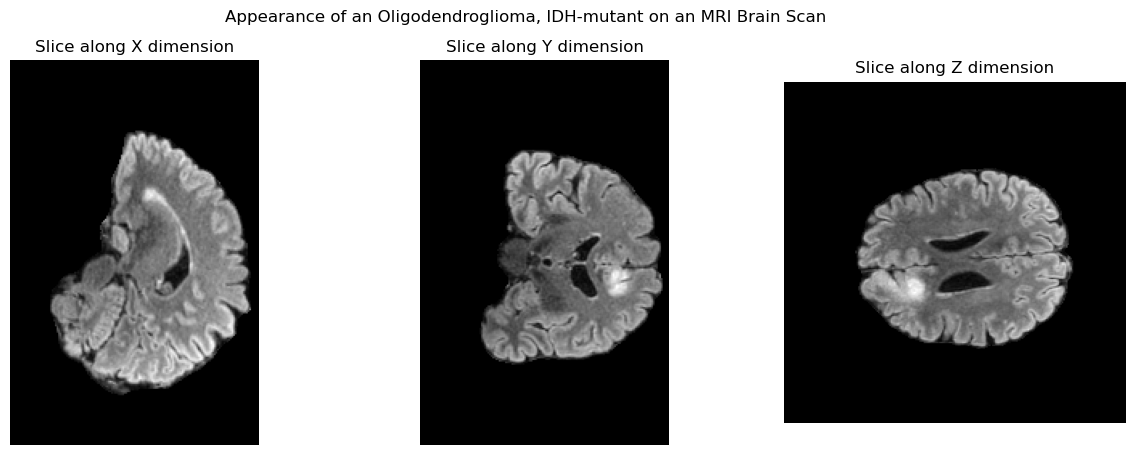

In [99]:
# Get a 2D slice of the image (for example, slice 105 from the third dimension)
folder_path = 'The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Load and extract the 2D slices along X, Y, and Z dimensions
for file_name in os.listdir(folder_path):
    if file_name.endswith('540_FLAIR.nii.gz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the image using nibabel
        image = nib.load(file_path)
        data = image.get_fdata()
        
        # Extract the tumor section slices
        slice_x = data[110, :, :]
        slice_y = data[:, 120, :]
        slice_z = data[:, :, 105]
        
        # Plot the tumor slices
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        axes[0].imshow(slice_x, cmap='gray')
        axes[0].set_title('Slice along X dimension')
        axes[0].axis('off')
        
        axes[1].imshow(slice_y, cmap='gray')
        axes[1].set_title('Slice along Y dimension')
        axes[1].axis('off')
        
        axes[2].imshow(slice_z, cmap='gray')
        axes[2].set_title('Slice along Z dimension')
        axes[2].axis('off')
        
        plt.suptitle('Appearance of an Oligodendroglioma, IDH-mutant on an MRI Brain Scan')
        plt.show()

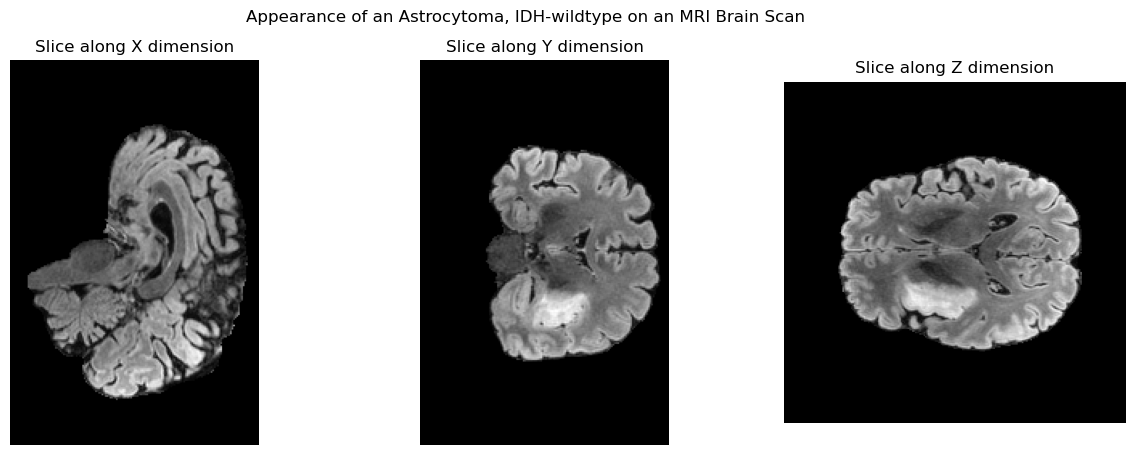

In [100]:
# Get a 2D slice of the image (for example, slice 105 from the third dimension)
folder_path = 'The University of California San Francisco Preoperative Diffuse Glioma MRI (UCSF-PDGM)'

# Load and extract the 2D slices along X, Y, and Z dimensions
for file_name in os.listdir(folder_path):
    if file_name.endswith('0249_FLAIR.nii.gz'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the image using nibabel
        image = nib.load(file_path)
        data = image.get_fdata()
        
        # Extract the tumor section slices
        slice_x = data[120, :, :]
        slice_y = data[:, 115, :]
        slice_z = data[:, :, 85]
        
        # Plot the tumor slices
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        axes[0].imshow(slice_x, cmap='gray')
        axes[0].set_title('Slice along X dimension')
        axes[0].axis('off')
        
        axes[1].imshow(slice_y, cmap='gray')
        axes[1].set_title('Slice along Y dimension')
        axes[1].axis('off')
        
        axes[2].imshow(slice_z, cmap='gray')
        axes[2].set_title('Slice along Z dimension')
        axes[2].axis('off')
        
        plt.suptitle('Appearance of an Astrocytoma, IDH-wildtype on an MRI Brain Scan')
        plt.show()